### Let's set up our work environment

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the data

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')

### Discover the data

In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Look at the Big Picture

It is a dataset of 3 columns: the different positions in a company, the level corresponding to each of these positions and the salary associated with each of these positions. As can be seen, there seems to be no proportionality between levels and wages. In fact, when you go from level 1 to level 2, the salary increases by 5000. But when you go from level 9 to level 10, the salary doubles. It goes from 50000 to 100000. It seems rather to be an increase not exponential but polynomial than linear extinction. It can thus be argued that the linear regression model that is appropriate for proportional evolutions is not adapted here.

### Frame the problem

Business Scenario: As a Data Scientist, we need to build a model that will be able to understand the correlation between the independent variables and the salary. The manager of the company wants to rely on this model to make simulations and make recruitment decisions.

### Visualize the data to gain insights

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


There are 10 instances in the dataset. It is very small by Machine Learning standards, but it's perfect to get started. Notice that the total attributes is 10 non-null values. We also noticed that the values in Position column are categorical attributes. 

### Preparation the data for Machine Learning algoritms

We will create our variables x and y. We will not include the column 'Position' in x because it is totally equivalent to the 'Level' column. We will just import the 'Level' column which will be our independent variable. And the column 'Salary' which is going to be our dependent variable.

### Create variables : x and y
Create our variables, we are going to use a very useful technical of Pandas, named Iloc.

In [7]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

### Visualize x and y

In [8]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

We see values of Level column. Good!

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

We also see here values of Salary column.

### No divide the dataset in Training / Test Set

Exceptionally, we will not divide our dataset in Training set and Test Set because we have few observations here (10 observations) and we need the maximum of observations to build our model.

### Select and train a model
Choice 1: Using the linear regression model / 
Choice 2: Use of the polynomial regression model After using the two models, we will see the one that is more adapted to our situation.

In [10]:
# Modèle de régression linéaire
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let's see the results

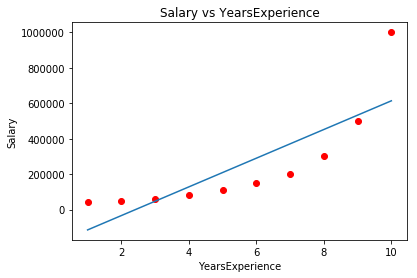

In [11]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x))
plt.title('Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

It is very clear that a linear regression model is not suitable since our observation points do not follow a straight line. It seems to have a polynomial form. The model can be improved by using a non-linear (polynomial) regression model to get closer to the observation points.

In [13]:
# Let's look at the accuracy
# Accuracy
regressor.score(x, y)

0.6690412331929895

In [20]:
# Modèle de régression polynomiale
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
regressor = LinearRegression()
regressor.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# Visualisons x_poly
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

### Let's see the results

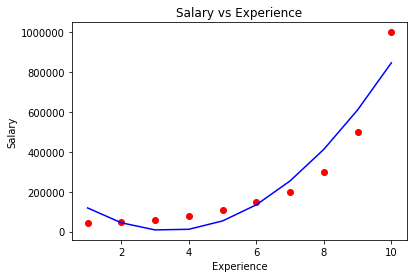

In [22]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

We clearly have our observation points in red and our polynominal regression model in blue and we can immediately see that it was much better with our observation points. It is therefore closer to our observation points compared to the first model. Some predictions are perfect and are on the curve. Others are less so but they are also good because they are not very far from the curve. We can do better. And we will add a degree to our polynomial regression model. In principle, the more we add a degree the more the curve will get closer to our observation points.

In [23]:
# Rajout d'un autre dégré à notre modèle de régression polynomiale
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
regressor = LinearRegression()
regressor.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let's visualize the graph again

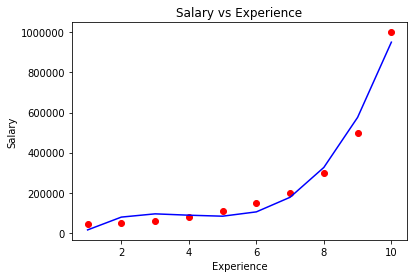

In [24]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

This time, we can see that the curve is closer to the observation points in red. The observation points are closer to our new polynomial regression model of degree 3 than the previous model (of degree 2). We will add another degree and see what happens.

In [25]:
# Rajout encore d'un autre dégré à notre modèle de régression polynomiale
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
regressor = LinearRegression()
regressor.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let's see again our graph

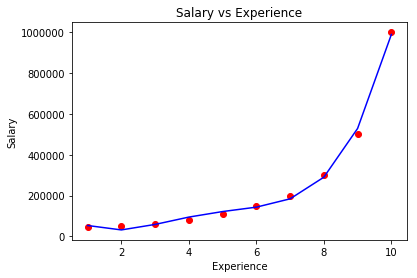

In [26]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

There, our model goes through all observation points in red. But we must be careful here, because we can be in the presence of overfitting. That is to say that our model is too well done at our points of observation (he will have learned too well from our correlations). And so if we have new observations, this model can pose us a problem. Because he has learned too well the correlations of the Training set and will therefore have difficulty predicting new observations that are independent of the correlations of this Training Set. 

### Accuracy

In [27]:
# Accuracy
regressor.score(x_poly, y)

0.9973922891706614

### 99.74%. Good score.
With this model of polynomial regression, we have a good score. This confirms the fact that this model is adapted to our situation here.